In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
df=pd.read_csv('Clean Data/2/200.txt',delimiter="\t",error_bad_lines=False,low_memory=False)

In [3]:
df= df.drop(columns=['agency_cd', 'tz_cd','176731_00010_cd','176732_00095_cd','176733_00300_cd','176734_00400_cd','176738_00045_cd','176741_00065_cd','259913_00065_cd'])

In [4]:
df = df.iloc[1:]

In [5]:
df.apply(pd.to_numeric, errors='ignore')

site_no          datetime  176731_00010  176732_00095  176733_00300  \
1       2110802.0  2009-02-07 01:15         14.37           9.8           7.8   
2       2110802.0  2009-02-07 01:30         14.24           9.8           7.8   
3       2110802.0  2009-02-07 01:45         14.13           9.8           7.8   
4       2110802.0  2009-02-07 02:00         14.02           9.8           7.8   
5       2110802.0  2009-02-07 02:15         13.92           9.8           7.8   
...           ...               ...           ...           ...           ...   
406002  2110802.0  2020-09-18 11:30         18.23           4.1          25.6   
406003  2110802.0  2020-09-18 11:45         18.28           4.0          25.6   
406004  2110802.0  2020-09-18 12:00         18.32           3.9          25.7   
406005  2110802.0  2020-09-18 12:15         18.38           4.0          25.7   
406006        NaN               NaN           NaN           NaN           NaN   

        176734_00400  176738_00045  176741_00065  259913_00065  
1                NaN           NaN           NaN           NaN  
2                NaN           NaN           NaN           NaN  
3                NaN           NaN           NaN           NaN  
4                NaN           NaN           NaN           NaN  
5                NaN           NaN           NaN           NaN  
...              ...           ...           ...           ...  
406002           NaN           NaN           NaN           NaN  
406003           NaN           NaN           NaN           NaN  
406004           NaN           NaN           NaN           NaN  
406005           NaN           NaN           NaN           NaN  
406006           NaN           NaN           NaN           NaN  

[406006 rows x 9 columns]

In [6]:
df.head(10)

site_no          datetime 176731_00010 176732_00095 176733_00300  \
1   02110802  2009-02-07 01:15        14.37          9.8          7.8   
2   02110802  2009-02-07 01:30        14.24          9.8          7.8   
3   02110802  2009-02-07 01:45        14.13          9.8          7.8   
4   02110802  2009-02-07 02:00        14.02          9.8          7.8   
5   02110802  2009-02-07 02:15        13.92          9.8          7.8   
6   02110802  2009-02-07 02:30        13.80          9.8          7.8   
7   02110802  2009-02-07 02:45        13.71          9.8          7.8   
8   02110802  2009-02-07 03:00        13.61          9.8          7.8   
9   02110802  2009-02-07 03:15        13.53          9.8          7.8   
10  02110802  2009-02-07 03:30        13.48          9.8          7.8   

   176734_00400 176738_00045 176741_00065 259913_00065  
1           NaN          NaN          NaN          NaN  
2           NaN          NaN          NaN          NaN  
3           NaN          NaN          NaN          NaN  
4           NaN          NaN          NaN          NaN  
5           NaN          NaN          NaN          NaN  
6           NaN          NaN          NaN          NaN  
7           NaN          NaN          NaN          NaN  
8           NaN          NaN          NaN          NaN  
9           NaN          NaN          NaN          NaN  
10          NaN          NaN          NaN          NaN

In [7]:
df.dtypes

site_no         object
datetime        object
176731_00010    object
176732_00095    object
176733_00300    object
176734_00400    object
176738_00045    object
176741_00065    object
259913_00065    object
dtype: object

In [8]:
df['176731_00010']=df['176731_00010'].astype(str).astype(float)
df['176732_00095']=df['176732_00095'].astype(str).astype(float)
df['176733_00300']=df['176733_00300'].astype(str).astype(float)
df['176734_00400']=df['176734_00400'].astype(str).astype(float)
df['176738_00045']=df['176738_00045'].astype(str).astype(float)
df['176741_00065']=df['176741_00065'].astype(str).astype(float)

In [9]:
df.dtypes

site_no          object
datetime         object
176731_00010    float64
176732_00095    float64
176733_00300    float64
176734_00400    float64
176738_00045    float64
176741_00065    float64
259913_00065     object
dtype: object

In [10]:
df['date'] = pd.to_datetime(df['datetime'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [11]:
df = df.rename(columns={"176731_00010": "Temperature", "176732_00095": "Specific conductance","176733_00300": "Dissolved Oxygen","176734_00400": "pH","176738_00045": "Precipitation","176741_00065": "Gage height, feet","259913_00065": "Gage height, feet-NAVD 88" })

In [12]:
df.loc[df['Specific conductance'].idxmax()]

site_no                                 02110802
datetime                        2011-01-18 12:00
Temperature                                 16.9
Specific conductance                        12.2
Dissolved Oxygen                             4.5
pH                                           NaN
Precipitation                                NaN
Gage height, feet                            NaN
Gage height, feet-NAVD 88                    NaN
date                         2011-01-18 12:00:00
year                                        2011
month                                          1
Name: 68145, dtype: object

In [13]:
df.loc[df['Specific conductance'].idxmin()]

site_no                                 02110802
datetime                        2013-07-19 10:00
Temperature                                19.08
Specific conductance                           0
Dissolved Oxygen                            26.2
pH                                           NaN
Precipitation                                NaN
Gage height, feet                            NaN
Gage height, feet-NAVD 88                    NaN
date                         2013-07-19 10:00:00
year                                        2013
month                                          7
Name: 155770, dtype: object

In [14]:
df= df.dropna(subset=['Dissolved Oxygen','Temperature','Specific conductance'])

In [15]:
df['Class'] = np.where((df['Specific conductance'] > 5) & (df['Dissolved Oxygen'] < 12), 0, 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397244 entries, 1 to 406005
Data columns (total 13 columns):
site_no                      397244 non-null object
datetime                     397244 non-null object
Temperature                  397244 non-null float64
Specific conductance         397244 non-null float64
Dissolved Oxygen             397244 non-null float64
pH                           0 non-null float64
Precipitation                0 non-null float64
Gage height, feet            0 non-null float64
Gage height, feet-NAVD 88    0 non-null object
date                         397244 non-null datetime64[ns]
year                         397244 non-null float64
month                        397244 non-null float64
Class                        397244 non-null int32
dtypes: datetime64[ns](1), float64(8), int32(1), object(3)
memory usage: 40.9+ MB


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397244 entries, 1 to 406005
Data columns (total 13 columns):
site_no                      397244 non-null object
datetime                     397244 non-null object
Temperature                  397244 non-null float64
Specific conductance         397244 non-null float64
Dissolved Oxygen             397244 non-null float64
pH                           0 non-null float64
Precipitation                0 non-null float64
Gage height, feet            0 non-null float64
Gage height, feet-NAVD 88    0 non-null object
date                         397244 non-null datetime64[ns]
year                         397244 non-null float64
month                        397244 non-null float64
Class                        397244 non-null int32
dtypes: datetime64[ns](1), float64(8), int32(1), object(3)
memory usage: 40.9+ MB


In [18]:
df.isna().sum()

site_no                           0
datetime                          0
Temperature                       0
Specific conductance              0
Dissolved Oxygen                  0
pH                           397244
Precipitation                397244
Gage height, feet            397244
Gage height, feet-NAVD 88    397244
date                              0
year                              0
month                             0
Class                             0
dtype: int64

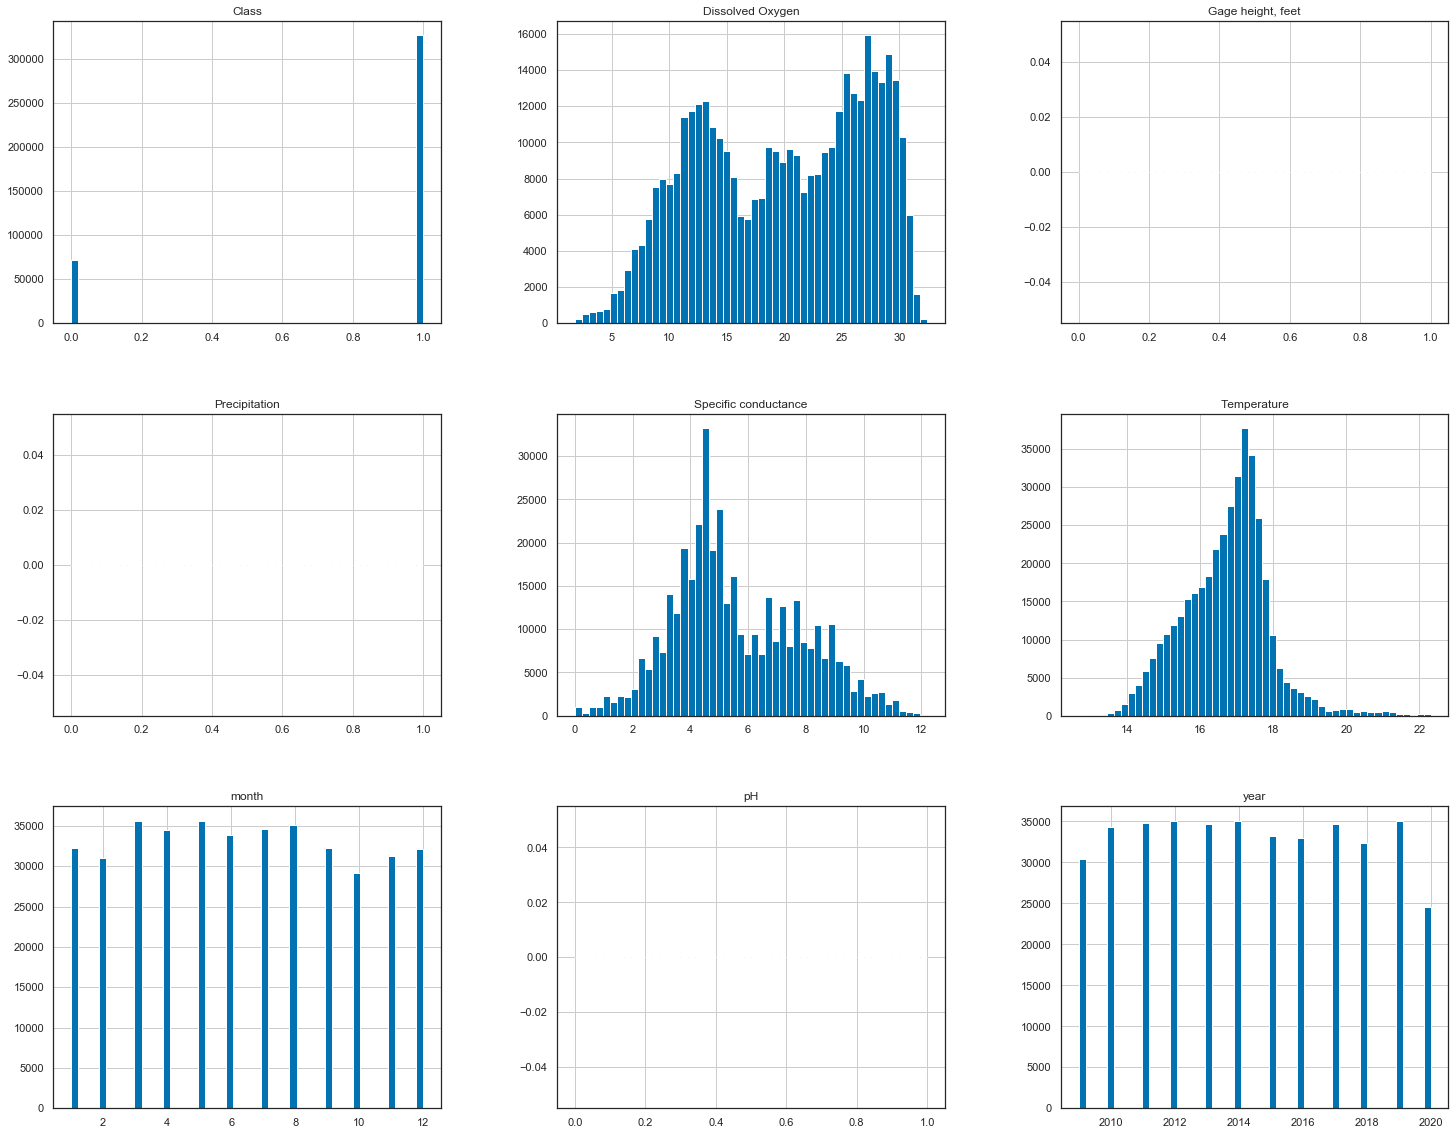

In [19]:
sns.set(color_codes=True, style="white", palette="colorblind")
axes=df.hist(bins=50,figsize=(25,20))

Text(0.5, 1.0, 'Distribution of Dissolved Oxygen Variable')

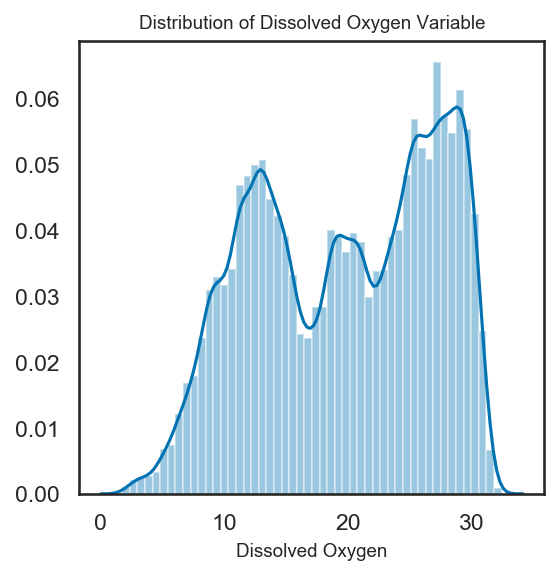

In [20]:
sns.set(color_codes=True, style="white", palette="colorblind")
graph=plt.figure(figsize=(4,4),dpi=150)
sns.distplot(df['Dissolved Oxygen'],kde=True)
plt.xlabel('Dissolved Oxygen',fontsize=9)
plt.title('Distribution of Dissolved Oxygen Variable',fontsize=9)

Text(0.5, 1.0, 'Distribution of Specific conductance Variable')

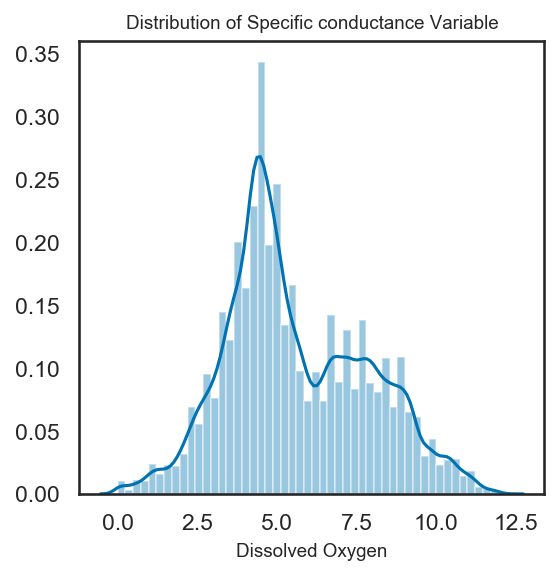

In [21]:
sns.set(color_codes=True, style="white", palette="colorblind")
graph=plt.figure(figsize=(4,4),dpi=150)
sns.distplot(df['Specific conductance'],kde=True)
plt.xlabel('Dissolved Oxygen',fontsize=9)
plt.title('Distribution of Specific conductance Variable',fontsize=9)

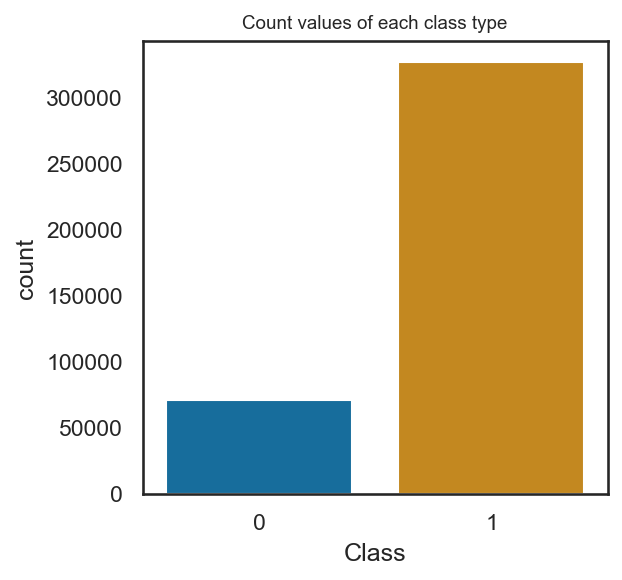

In [22]:
graph=plt.figure(figsize=(4,4),dpi=150)
plt.title('Count values of each class type',fontsize=9)
sns.countplot('Class',data=df)

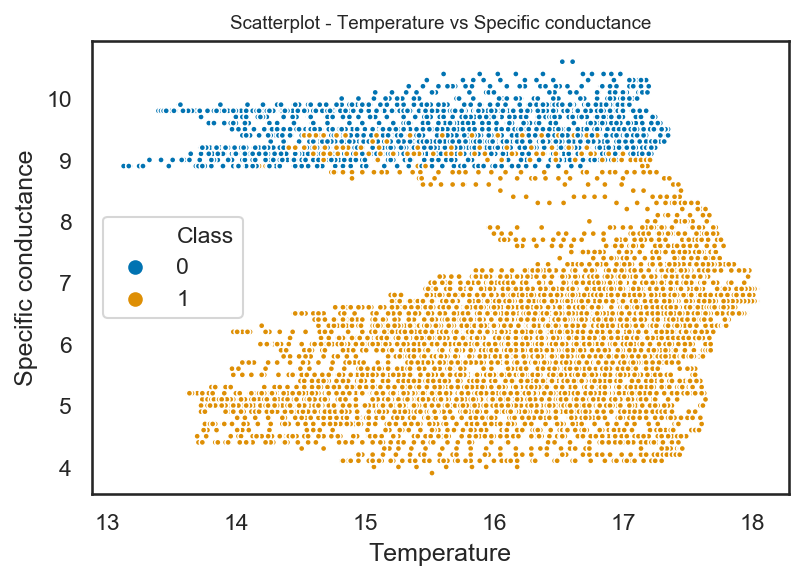

In [23]:
graph=plt.figure(dpi=150)
plt.title('Scatterplot - Temperature vs Specific conductance',fontsize=9)
sns.scatterplot(x='Temperature',y='Specific conductance',hue='Class',data=df.iloc[0:10000],marker='.')

In [24]:
### Model Creations using Imbalanced Data

In [25]:
# *Splitting the data into train-test split*

In [26]:
#df1 = df[['Temperature', 'Dissolved Oxygen','Specific conductance', 'Class']]

In [27]:
df1 = df[['Specific conductance', 'Temperature', 'Class']]

In [28]:
X1 = df1.drop(['Class'],axis=1).values
Y1 = df1['Class'].values
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.25,random_state=25)

In [29]:
#Logistic Regression

In [30]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

C:\Users\sriva\Miniconda3\envs\cpsc6820\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training Confusion matrix:
 [[ 40394  13031]
 [ 10093 234415]]

Testing Confusion matrix:
 [[13462  4206]
 [ 3246 78397]]

Recall Score:		0.960241539384883
Precision Score:	0.9490817524787235
F1 Score:		0.9546290320616636
Accuracy:		0.9249629950357966


In [31]:
#Gaussian Naive Bayes

In [32]:
model = GaussianNB()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[ 42937  10488]
 [ 13706 230802]]

Testing Confusion matrix:
 [[14262  3406]
 [ 4421 77222]]

Recall Score:		0.9458496135614811
Precision Score:	0.9577566106067371
F1 Score:		0.9517658731381455
Accuracy:		0.9211869782803517


In [33]:
#DecisionTree

In [34]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[ 43753   9672]
 [  8508 236000]]

Testing Confusion matrix:
 [[13539  4129]
 [ 3764 77879]]

Recall Score:		0.9538968435750769
Precision Score:	0.9496512535362404
F1 Score:		0.9517693139669173
Accuracy:		0.9205223993313933


In [35]:
#K-Neighbors Neighbour

In [36]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[ 42117  11308]
 [  8619 235889]]

Testing Confusion matrix:
 [[13273  4395]
 [ 3490 78153]]

Recall Score:		0.957252918192619
Precision Score:	0.9467582497456025
F1 Score:		0.9519766613273565
Accuracy:		0.9206029543555094


In [37]:
#Random Forest

In [38]:
model = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[ 42333  11092]
 [  7372 237136]]

Testing Confusion matrix:
 [[13122  4546]
 [ 3283 78360]]

Recall Score:		0.9597883468270396
Precision Score:	0.9451668154295226
F1 Score:		0.9524214671617574
Accuracy:		0.9211668395243225


In [41]:
# Finding the total number of observations in each class labels

In [42]:
counts = Counter(df1['Class'])
print(f"Number of class 0 : {counts[0]}\nNumber of class 1 : {counts[1]}\n")

Number of class 0 : 71093
Number of class 1 : 326151



In [43]:
# As we can see that the above class has great imbalance between count of positive values and negative values.
# Inorder to get more accurate results, we need to address the imbalance of data.

# Two key techniques of sampling that can be used to address the imbalance of data are as follows:

# Under-Sampling : To delete examples from the majority class
# Over-Sampling : To duplicate examples from the minority class

In [44]:
df_shuffled=df1.sample(frac=1)
df_shuffled.head()

Specific conductance  Temperature  Class
23888                    5.7        16.49      1
290634                   4.6        17.45      1
288899                   3.3        16.21      1
185199                   4.3        15.49      1
192778                   3.3        17.73      1

In [45]:
fdata=df_shuffled.loc[df_shuffled['Class']==1]
print(f"Shape of this data is :\t{fdata.shape}\n")
fdata

Shape of this data is :	(326151, 3)



Specific conductance  Temperature  Class
23888                    5.7        16.49      1
290634                   4.6        17.45      1
288899                   3.3        16.21      1
185199                   4.3        15.49      1
192778                   3.3        17.73      1
...                      ...          ...    ...
5357                     6.0        16.40      1
388861                   5.3        17.46      1
250838                   6.0        17.37      1
391928                   4.8        15.22      1
181972                   5.5        17.21      1

[326151 rows x 3 columns]

In [46]:
nfdata= df_shuffled.loc[df_shuffled['Class']==0].sample(n=41482,random_state=3)
print(f"Shape of this data is :\t{nfdata.shape}\n")
nfdata


Shape of this data is :	(41482, 3)



Specific conductance  Temperature  Class
314008                   9.2        16.58      0
350723                   8.4        18.29      0
314330                   9.2        16.24      0
70828                    9.2        16.39      0
210272                   9.3        17.39      0
...                      ...          ...    ...
68206                   11.1        14.41      0
174356                  10.8        17.57      0
312755                  10.3        14.20      0
205183                   7.3        15.54      0
313220                  10.3        16.47      0

[41482 rows x 3 columns]

In [47]:
rus = RandomUnderSampler()
undersampled_attributes,undersampled_labels = rus.fit_resample(df_shuffled.drop(['Class'],axis=1), df_shuffled['Class'])

In [48]:
undersampled_attributes

Specific conductance  Temperature
0                        8.0        16.84
1                        7.4        15.46
2                        7.6        17.83
3                       10.2        15.53
4                        7.9        20.52
...                      ...          ...
142181                   4.6        15.14
142182                   3.3        17.29
142183                   4.5        16.08
142184                   6.2        16.76
142185                   4.2        17.57

[142186 rows x 2 columns]

In [49]:
undersampled_labels

0         0
1         0
2         0
3         0
4         0
         ..
142181    1
142182    1
142183    1
142184    1
142185    1
Name: Class, Length: 142186, dtype: int32

In [50]:
undersampled=pd.concat([pd.DataFrame(undersampled_attributes),pd.DataFrame(undersampled_labels)],axis=1)
undersampled.columns=df1.columns
print(f"The shape of the undersampled data :\t{undersampled.shape}\n")
undersampled

The shape of the undersampled data :	(142186, 3)



Specific conductance  Temperature  Class
0                        8.0        16.84      0
1                        7.4        15.46      0
2                        7.6        17.83      0
3                       10.2        15.53      0
4                        7.9        20.52      0
...                      ...          ...    ...
142181                   4.6        15.14      1
142182                   3.3        17.29      1
142183                   4.5        16.08      1
142184                   6.2        16.76      1
142185                   4.2        17.57      1

[142186 rows x 3 columns]

Text(0.5, 1.0, 'Count Histogram of each label')

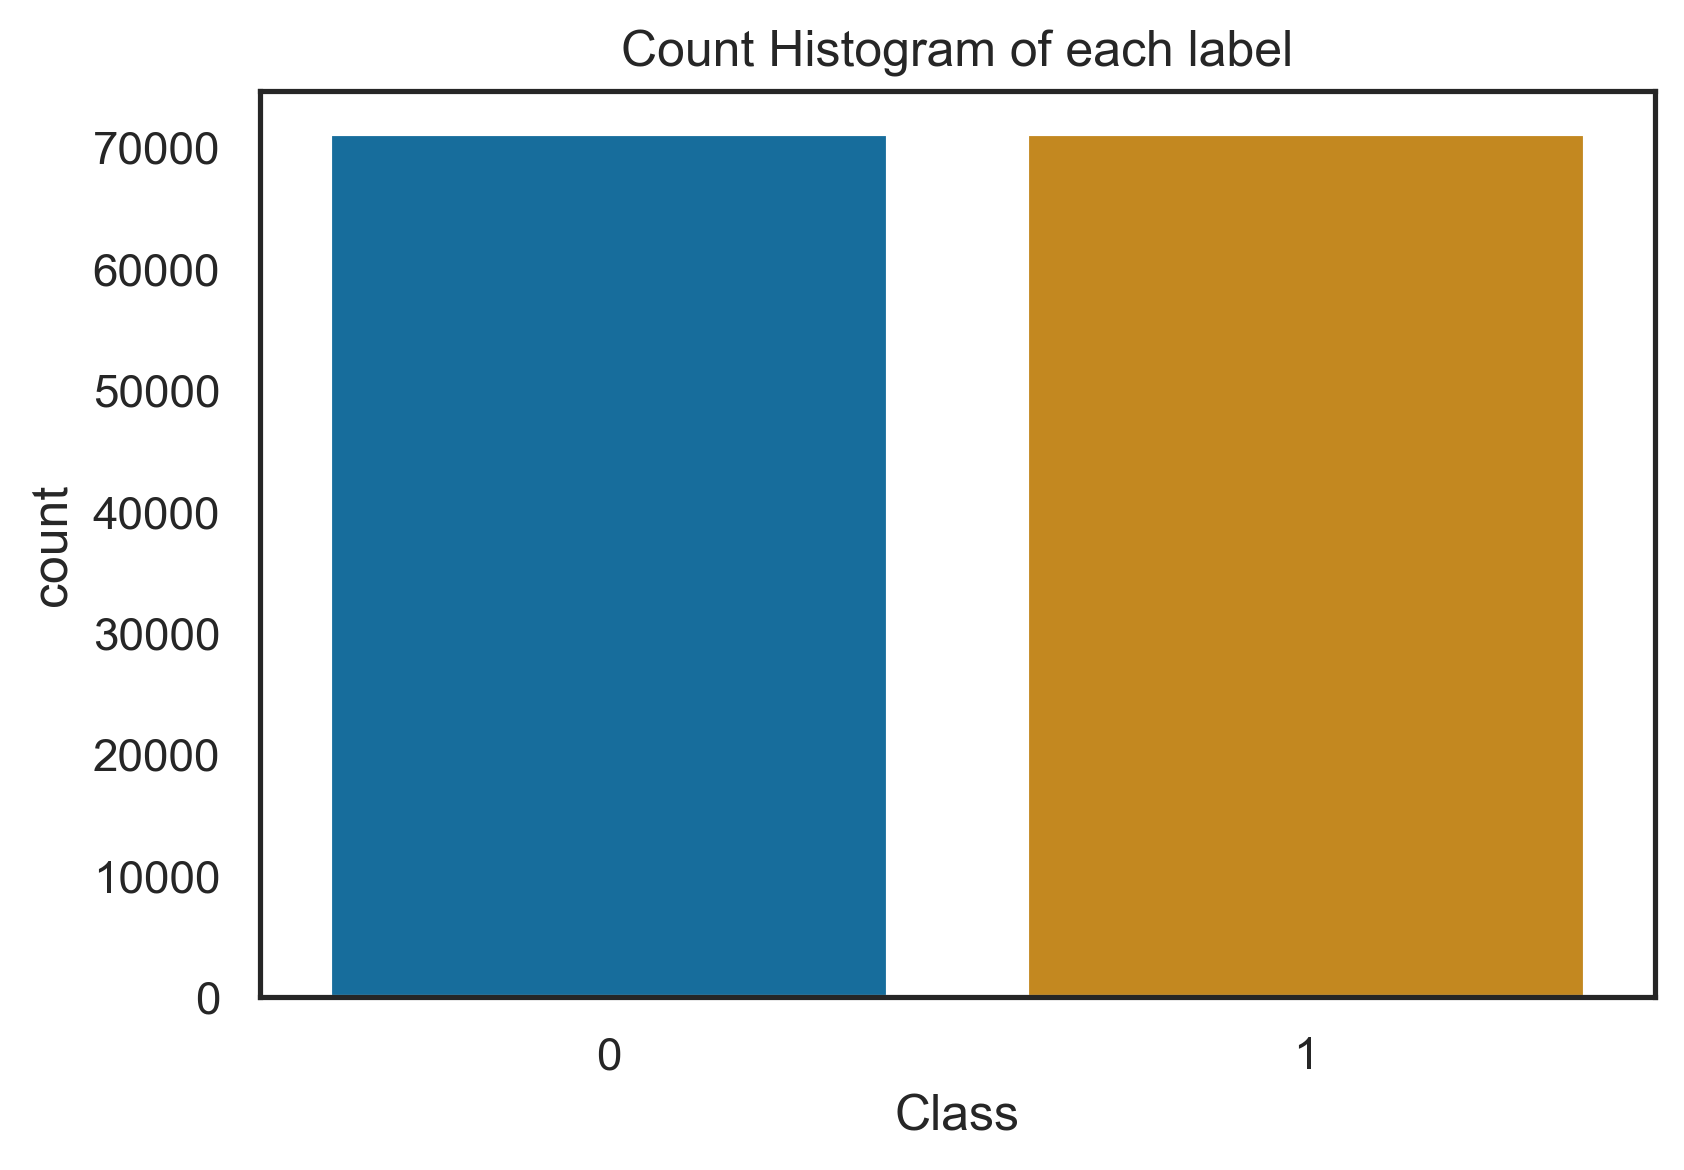

In [51]:
graph=plt.figure(dpi=300)
sns.countplot('Class',data=undersampled)
plt.title('Count Histogram of each label')

Text(0.5, 1.0, 'Scatterplot - Temperature vs Specific conductance')

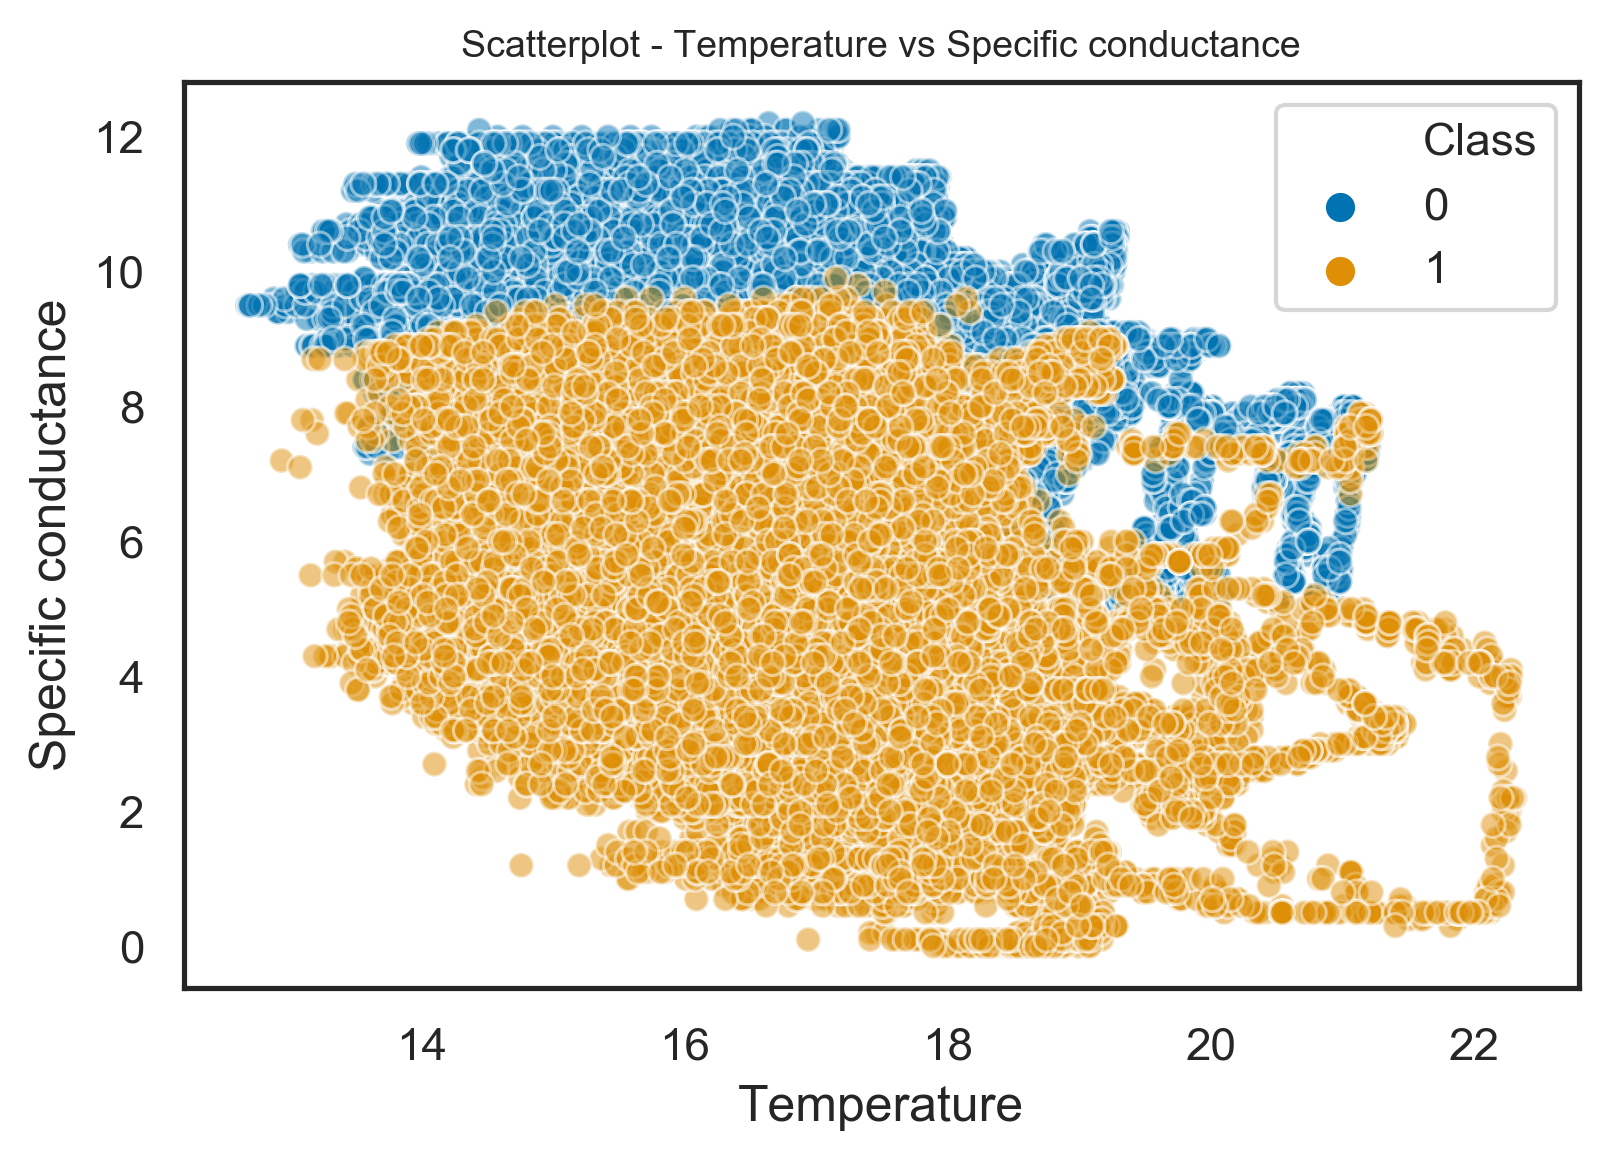

In [52]:
graph=plt.figure(dpi=300)
sns.scatterplot(x='Temperature',y='Specific conductance',hue='Class',data = undersampled,alpha=0.5)
plt.title('Scatterplot - Temperature vs Specific conductance',fontsize=9)

In [53]:
X2 = undersampled.drop(['Class'],axis=1).values
Y2 = undersampled['Class'].values
x_train,x_test,y_train,y_test = train_test_split(X2,Y2,test_size=0.25,random_state=25)

In [54]:
#Logistic Regression

In [55]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

C:\Users\sriva\Miniconda3\envs\cpsc6820\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training Confusion matrix:
 [[49776  3710]
 [ 6464 46689]]

Testing Confusion matrix:
 [[16400  1207]
 [ 2186 15754]]

Recall Score:		0.8781493868450391
Precision Score:	0.9288367431165615
F1 Score:		0.9027821552391049
Accuracy:		0.9045489070807663


In [56]:
#Gaussian Naive Bayes

In [57]:
model = GaussianNB()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[50176  3310]
 [ 7113 46040]]

Testing Confusion matrix:
 [[16534  1073]
 [ 2422 15518]]

Recall Score:		0.8649944258639911
Precision Score:	0.9353263817732506
F1 Score:		0.8987865975500275
Accuracy:		0.9016794666216559


In [58]:
#DecisionTree

In [59]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[52176  1310]
 [ 5484 47669]]

Testing Confusion matrix:
 [[16485  1122]
 [ 2557 15383]]

Recall Score:		0.8574693422519509
Precision Score:	0.9320205998182369
F1 Score:		0.8931920452895921
Accuracy:		0.8965032210875742


In [60]:
#K-Neighbors Neighbour

In [61]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[50822  2664]
 [ 5279 47874]]

Testing Confusion matrix:
 [[16373  1234]
 [ 2242 15698]]

Recall Score:		0.8750278706800446
Precision Score:	0.9271202456886369
F1 Score:		0.900321174581326
Accuracy:		0.9022139702365882


In [62]:
#Random Forest

In [63]:
model = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[51163  2323]
 [ 4666 48487]]

Testing Confusion matrix:
 [[16156  1451]
 [ 2229 15711]]

Recall Score:		0.875752508361204
Precision Score:	0.9154527444353805
F1 Score:		0.8951626687938009
Accuracy:		0.8964750893183673


In [64]:
#Support Vector Classification

In [65]:
model = SVC(kernel='rbf', C=10)
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[51805  1681]
 [ 7947 45206]]

Testing Confusion matrix:
 [[17045   562]
 [ 2704 15236]]

Recall Score:		0.8492753623188406
Precision Score:	0.9644258766932523
F1 Score:		0.9031952101487937
Accuracy:		0.908121641770051


In [78]:
#oversampling 

In [66]:
sm= SMOTE()
oversampled_attributes,oversampled_labels=sm.fit_resample(df1.drop(['Class'],axis=1),df1['Class'])

In [67]:
oversampled_attributes

Specific conductance  Temperature
0                        9.8    14.370000
1                        9.8    14.240000
2                        9.8    14.130000
3                        9.8    14.020000
4                        9.8    13.920000
...                      ...          ...
652297                  11.2    16.573151
652298                   9.3    17.590000
652299                   8.6    18.550000
652300                   8.6    15.918589
652301                  10.9    17.693696

[652302 rows x 2 columns]

In [68]:
oversampled=pd.concat([pd.DataFrame(oversampled_attributes),pd.DataFrame(oversampled_labels)],axis=1)
oversampled.columns=df1.columns
oversampled

Specific conductance  Temperature  Class
0                        9.8    14.370000      0
1                        9.8    14.240000      0
2                        9.8    14.130000      0
3                        9.8    14.020000      0
4                        9.8    13.920000      0
...                      ...          ...    ...
652297                  11.2    16.573151      0
652298                   9.3    17.590000      0
652299                   8.6    18.550000      0
652300                   8.6    15.918589      0
652301                  10.9    17.693696      0

[652302 rows x 3 columns]

Text(0.5, 1.0, 'Count Histogram of each label')

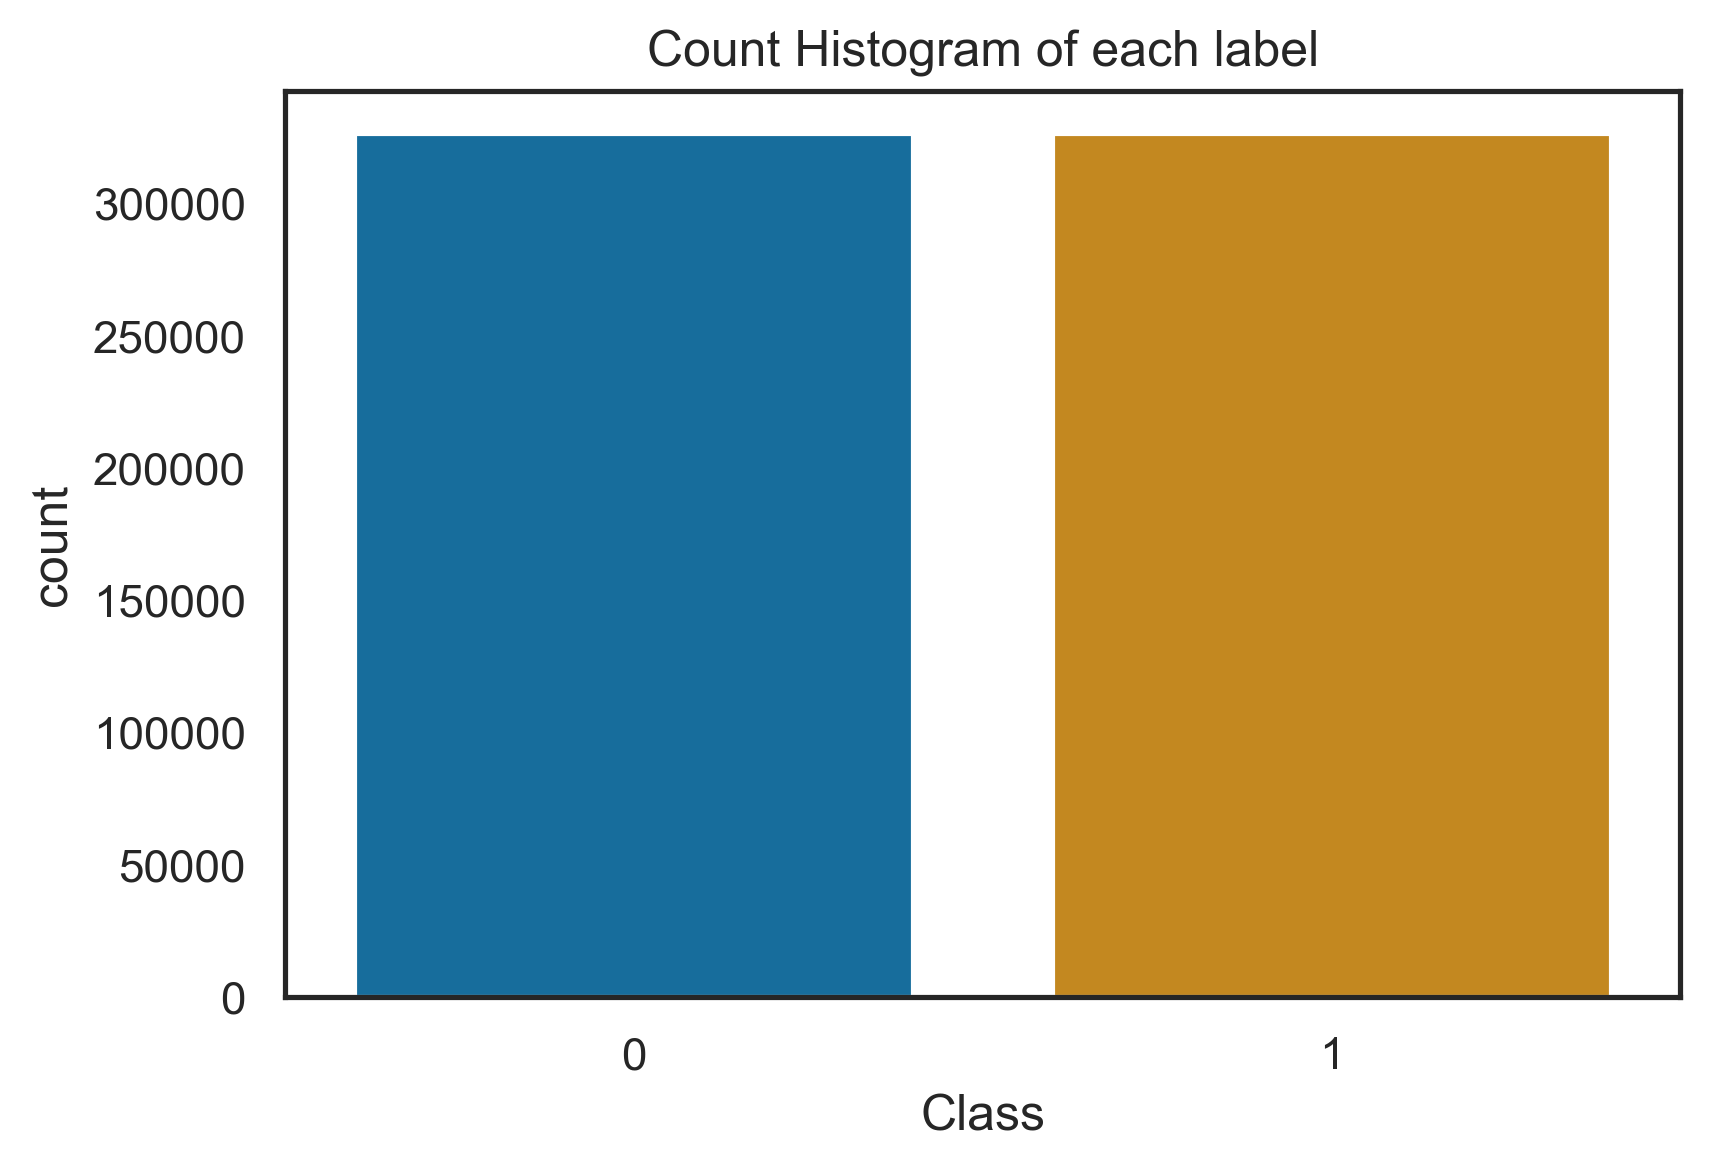

In [69]:
graph=plt.figure(dpi=300)
sns.countplot('Class',data=oversampled)
plt.title('Count Histogram of each label')

Text(0.5, 1.0, 'Scatterplot - Temperature vs Specific conductance')

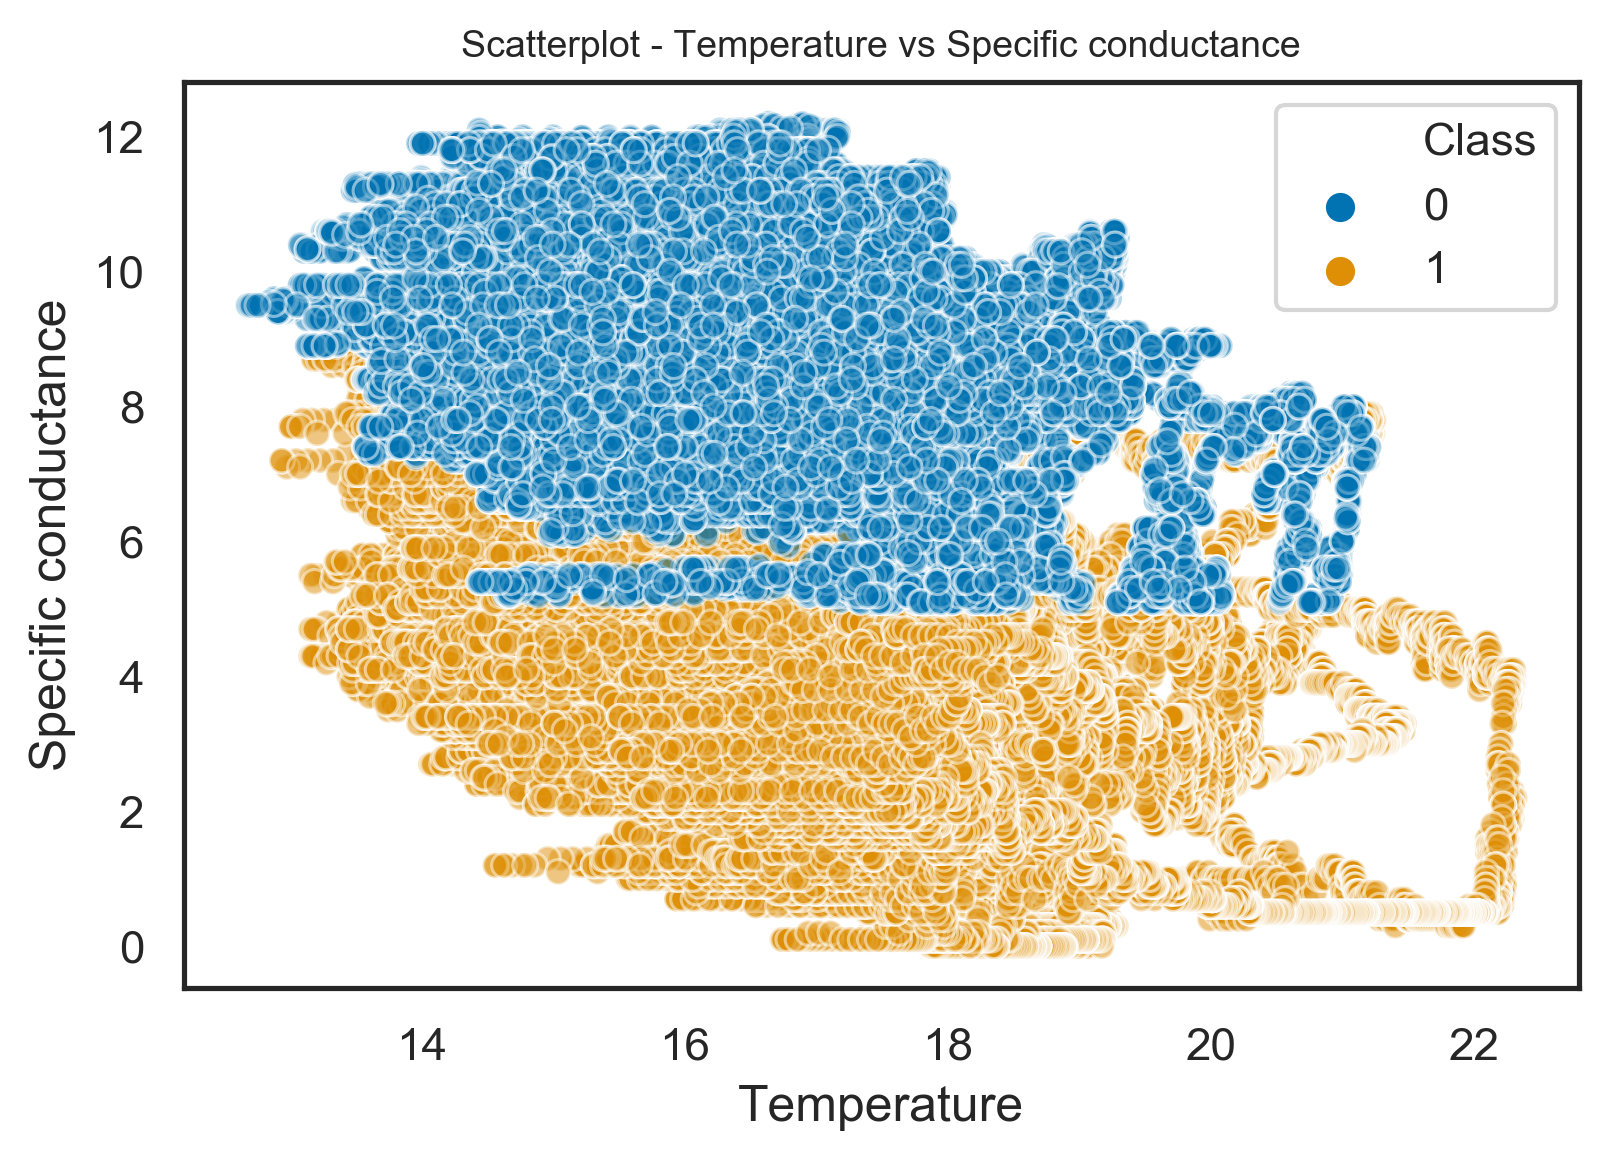

In [70]:
graph=plt.figure(dpi=300)
sns.scatterplot(x='Temperature',y='Specific conductance',hue='Class',data = oversampled,alpha=0.5)
plt.title('Scatterplot - Temperature vs Specific conductance',fontsize=9)

In [71]:
X3 = oversampled.drop(['Class'],axis=1).values
Y3 = oversampled['Class'].values
x_train,x_test,y_train,y_test = train_test_split(X3,Y3,test_size=0.25,random_state=25)


In [72]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

C:\Users\sriva\Miniconda3\envs\cpsc6820\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training Confusion matrix:
 [[226730  17904]
 [ 28682 215910]]

Testing Confusion matrix:
 [[75580  5937]
 [ 9570 71989]]

Recall Score:		0.8826616314569821
Precision Score:	0.9238123347791495
F1 Score:		0.9027682854186915
Accuracy:		0.9049093674115136


In [73]:
model = GaussianNB()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[229517  15117]
 [ 32531 212061]]

Testing Confusion matrix:
 [[76516  5001]
 [10942 70617]]

Recall Score:		0.8658394536470531
Precision Score:	0.9338649527890185
F1 Score:		0.8985665841694396
Accuracy:		0.9022357673722682


In [74]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[238243   6391]
 [ 19795 224797]]

Testing Confusion matrix:
 [[77595  3922]
 [ 7423 74136]]

Recall Score:		0.9089861327382631
Precision Score:	0.9497553101539881
F1 Score:		0.9289236108935767
Accuracy:		0.930431209987981


In [75]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[230504  14130]
 [ 19935 224657]]

Testing Confusion matrix:
 [[75778  5739]
 [ 7450 74109]]

Recall Score:		0.9086550840495837
Precision Score:	0.9281259392846408
F1 Score:		0.918287310959252
Accuracy:		0.9191235988128235


In [76]:
model = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[237079   7555]
 [ 19148 225444]]

Testing Confusion matrix:
 [[77087  4430]
 [ 7200 74359]]

Recall Score:		0.9117203496855038
Precision Score:	0.9437738770640571
F1 Score:		0.9274702522014617
Accuracy:		0.9286835585861807
